a) Importance of nouns for GELECTRA 

b) Importance of Question-Words

c) Difference between start and end tokens

d) No significant NER differences for different questiont types

e) Investigate Wo-Fragen, just for the sacke of wo == LOC/GEL theory


# Which POS ist most interesting for GELECTRA?

## Initialize Settings

In [1]:
%cd ..

C:\Users\Stefan.Beuchert\Desktop\backup_from_kubectl


In [2]:
# requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.analyzer import get_frequencies_as_data_frame_in_comparison_to_expected_frequencies
from src.get_data import enhance_data_with_question_type

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Stefan.Beuchert\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Stefan.Beuchert\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# config
number_of_features = 10 # the default value
number_of_samples = 5000 # the default value

source_path_for_data = f'data/Data_Preparation/lime_ns_{number_of_samples}_nf_{number_of_features}_after_frequency_analysis.json'

# list of possible POS tags
POS_tag_list = ['ADJ', 
                'ADP',
                'PUNCT',
                'ADV',
                'AUX',
                'SYM',
                'INTJ',
                'CCONJ',
                'X',
                'NOUN',
                'DET',
                'PROPN',
                'NUM',
                'VERB',
                'PART',
                'PRON',
                'SCONJ',
                'SPACE',
                '']

In [4]:
# load data
data_df = pd.read_json(source_path_for_data)
data_df['explanation'] = [pd.DataFrame(exp) for exp in data_df['explanation'].tolist()]
data_df = enhance_data_with_question_type(data_df)
data_df.head(1)

gibt es immer noch kohlenfadenlampen - has no question type
zum wievielten mal hintereinander stand der fc everton 1986 im fa cup finale - has no question type
ist usb mit atari mint benutzbar - has no question type
war die glorious revolution gewaltsam - has no question type
in wiefern erweiterte rudolf clausius das verständnis von energie und wärme - has no question type
haben wir im moment eine warm- oder kaltzeit - has no question type
war die republik der vereinigten niederlande ein zentralstaat - has no question type
ist frankreich offensiv, oder defensiv an den deutsch-französischen-krieg herangegangen - has no question type
sind usb 3.0.stecker mit älteren typen kompatibel - has no question type
müssen hunde gegen tollwut geimpft werden - has no question type
ist in englischen pubs das rauchen erlaubt - has no question type
ist kupfer gesundheitsschädlich - has no question type
liegt bildung im aufgabenbereich der verwaltungsbezirke von melbourne oder beim bundesstaat - has no 

,question,answers,context,document_id,is_impossible,usage,prediction,explanation,question_type
37495,Wie viele Amerikaner fühlen sich mehr als eine...,"[{'answer_id': 37854, 'document_id': 41057, 'q...",Race__United_States_Census_\n\n=== „Race“ ===\...,41057,False,test,fast sieben Millionen,position_id lime_token question_or_cont...,wie viel


## Importance of nouns for GELECTRA in general

A visualization of the POS layer with the token frequency as well as weighted average showes a strong occurence of nouns in the LIME highlights. The POS tag 'NOUN' (describing a noun) is by far the most common POS tag when looking at the total count for all six of the possible subsets of LIME highlights (LIME highlights for the start token, LIME hightlights for end token, only positive and negative LIME Highlights for start and end token). The same observation can be made for the 'PROPN' (describing a proper noun) tag that is second to the 'NOUN' tag in everey possible sub set. Even when the 'PROPN' shows less than halfe of the occureces as the 'NOUN' tag in each subset. The combination of 'NOUN' and 'PROPN' makes most of the POS tags that can describe a noun. The only other groups that could indicate a noun are 'NUM', which describes numbers (written in letters or as digits), or 'X', which is used for all the tokens that don't fit in any of the other possible POS categories. Both 'NUM' and 'X' are not looked at in more detail, since they make only a small part of the data set and determinig if the correspoding tokens are indeed nouns is not feasable with the existing setup.

The 'NOUN' tag describes all general nouns like 'dog', 'cat'or 'building', while 'PROPN' describe specific nouns like 'Lessi' (the dogs name), 'Google', 'Berlin' or 'Jupyter'.

https://universaldependencies.org/u/pos/all.html

For evaluating the importance of singel POS tags specifically nouns in generall. The POS frequency for each POS tag is calculated for: 
- frequency of POS tags for all tokens
- frequency of POS tags for tokens highlighted as relevant for the start token
- frequency of POS tags for tokens highlighted as relevant for the end token

From the total count of each POS tag across all tokens, a baseline is created that is used to normalize the token frequencies for the highlights. Claiming a high occurence of nouns in the highlights, when nouns are actually more common in generall would be a missleading statement.

In [5]:
frequencies_df = get_frequencies_as_data_frame_in_comparison_to_expected_frequencies('pos_tag', data_df, POS_tag_list)
frequencies_df

,general total,start token total,end token total,general percentage,start token percentage,end token percentage,start token deviation from general,end token deviation from general,start token total deviation,end token total deviation
ADJ,62598,1383,1362,0.078487,0.063557,0.062592,-0.190225,-0.202521,-324.881042,-345.881042
ADP,104039,2128,2039,0.130447,0.097794,0.093704,-0.250316,-0.281670,-710.528958,-799.528958
PUNCT,55,0,3,0.000069,0.000000,0.000138,-1.000000,0.999224,-1.500582,1.499418
ADV,59023,1903,1885,0.074005,0.087454,0.086627,0.181736,0.170558,292.656814,274.656814
AUX,30939,1144,1135,0.038792,0.052574,0.052160,0.355260,0.344598,299.881473,290.881473
SYM,0,0,0,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000
INTJ,0,0,0,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000
CCONJ,26093,407,503,0.032716,0.018704,0.023116,-0.428293,-0.293444,-304.903576,-208.903576
X,3946,72,63,0.004948,0.003309,0.002895,-0.331228,-0.414824,-35.659967,-44.659967
NOUN,190405,5732,5845,0.238735,0.263419,0.268612,0.103394,0.125146,537.120136,650.120136


In [6]:
if False:

    # get NOUN and PROPN counts in LIME highlights

    # get list of all explanations (containing every data point with info about each token)
    explanation_list = data_df.explanation.tolist()

    # create empty dicts to count POS tags 
    general_counter_for_POS = {POS_tag: 0 for POS_tag in POS_tag_list}
    lime_highlights_for_start_tokens__counter_for_POS = {POS_tag: 0 for POS_tag in POS_tag_list}
    lime_highlights_for_end_tokens__counter_for_POS = {POS_tag: 0 for POS_tag in POS_tag_list}


    # for each token in each data point
    for explanation in explanation_list:

            # get lime highlights for start and end token subsets
            lime_highlights_for_start_token = explanation[explanation['start_token_weight'].notnull()]
            lime_highlights_for_end_token = explanation[explanation['end_token_weight'].notnull()]

            # get total count of each POS tag for that data point
            total_count_of_each_POS = explanation['pos_tag'].value_counts()
            total_count_of_each_POS_for_start_token_highlights = lime_highlights_for_start_token['pos_tag'].value_counts()
            total_count_of_each_POS_for_end_token_highlights = lime_highlights_for_end_token['pos_tag'].value_counts()

            # convert panda.Series to dicts for better extraction of values
            total_count_of_each_POS_dict = total_count_of_each_POS.to_dict()
            total_count_of_each_POS_for_start_token_highlights_dict = total_count_of_each_POS_for_start_token_highlights.to_dict()
            total_count_of_each_POS_for_end_token_highlights_dict = total_count_of_each_POS_for_end_token_highlights.to_dict()


            # save POS counts in designated dicts
            for pos_tag in total_count_of_each_POS_dict:
                general_counter_for_POS[pos_tag] += total_count_of_each_POS_dict[pos_tag]

            for pos_tag in total_count_of_each_POS_for_start_token_highlights_dict:
                lime_highlights_for_start_tokens__counter_for_POS[pos_tag] += total_count_of_each_POS_for_start_token_highlights_dict[pos_tag]

            for pos_tag in total_count_of_each_POS_for_end_token_highlights_dict:
                lime_highlights_for_end_tokens__counter_for_POS[pos_tag] += total_count_of_each_POS_for_end_token_highlights_dict[pos_tag]

    # remove 'SPACE' and '' elements from the dict, as they do not represent valid tokens
    general_counter_for_POS.pop('SPACE')
    general_counter_for_POS.pop('')
    general_counter_for_POS.pop('SYM')
    general_counter_for_POS.pop('INTJ')

    lime_highlights_for_start_tokens__counter_for_POS.pop('SPACE')
    lime_highlights_for_start_tokens__counter_for_POS.pop('')
    lime_highlights_for_start_tokens__counter_for_POS.pop('SYM')
    lime_highlights_for_start_tokens__counter_for_POS.pop('INTJ')

    lime_highlights_for_end_tokens__counter_for_POS.pop('SPACE')
    lime_highlights_for_end_tokens__counter_for_POS.pop('')
    lime_highlights_for_end_tokens__counter_for_POS.pop('SYM')
    lime_highlights_for_end_tokens__counter_for_POS.pop('INTJ')

    # safe data in df
    frequencies_df = pd.DataFrame([general_counter_for_POS, 
                                   lime_highlights_for_start_tokens__counter_for_POS, 
                                   lime_highlights_for_end_tokens__counter_for_POS])

    frequencies_df = frequencies_df.T
    frequencies_df = frequencies_df.rename({0: 'general total', 1: 'start token total', 2: 'end token total'}, axis='columns')
    
    
    frequencies_df['general percentage'] = frequencies_df['general total'] / frequencies_df['general total'].sum()
    frequencies_df['start token percentage'] = frequencies_df['start token total'] / frequencies_df['start token total'].sum() 
    frequencies_df['end token percentage'] = frequencies_df['end token total'] / frequencies_df['end token total'].sum() 

    frequencies_df['start token deviation from general'] = (frequencies_df['start token percentage'] - frequencies_df['general percentage']) / frequencies_df['general percentage']
    frequencies_df['end token deviation from general'] = (frequencies_df['end token percentage'] - frequencies_df['general percentage']) / frequencies_df['general percentage']

    frequencies_df['start token total deviation'] = frequencies_df['start token total'] - (frequencies_df['general percentage'] * frequencies_df['start token total'].sum())
    frequencies_df['end token total deviation'] =  frequencies_df['end token total'] - (frequencies_df['general percentage'] * frequencies_df['end token total'].sum())

    frequencies_df

In [7]:
print(frequencies_df['general total'].sum())
print(frequencies_df['start token total'].sum())
print(frequencies_df['end token total'].sum())

797557
21760
21760


## POS on question level

In [8]:
# get question type labels and split data in groups
data_grouped_by_question_type = data_df.groupby('question_type')
list_of_question_types = list(data_grouped_by_question_type.groups.keys())

In [9]:
# calculate entity tags for each question type and save in dict

df_data_list = []

for question_type in list_of_question_types:
    question_type_group_df = data_grouped_by_question_type.get_group(question_type)
    element_count = len(question_type_group_df)
    
    # check if group has enough elements and is not the conflict group
    if element_count > 10 and question_type != 'conflict':
        
        frequencies_df = get_frequencies_as_data_frame_in_comparison_to_expected_frequencies('pos_tag', 
                                                                                             question_type_group_df, 
                                                                                             POS_tag_list)
        
        # get all tags and vavlues for start token highlights
        start_token_deviation_from_general = frequencies_df['start token deviation from general']
        
        for tag, value in start_token_deviation_from_general.items():
            
            new_data_point = {
                'question type' : question_type,
                'token type' : 'start_token_highlight',  
                'tag' : tag,
                'percentage difference' : value,
                'total samples available' : element_count
                }
            
            df_data_list.append(new_data_point)
            
        # get all tags and vavlues for end token highlights
        end_token_deviation_from_general = frequencies_df['end token deviation from general']
        
        for tag, value in end_token_deviation_from_general.items():
            
            new_data_point = {
                'question type' : question_type,
                'token type' : 'end_token_highlight',  
                'tag' : tag,
                'percentage difference' : value,
                'total samples available' : element_count
                }
            
            df_data_list.append(new_data_point)
        
overview_df = pd.DataFrame(df_data_list)
overview_df.head(2)

,question type,token type,tag,percentage difference,total samples available
0,undefined,start_token_highlight,ADJ,0.021511,25
1,undefined,start_token_highlight,ADP,-0.178148,25


## Insights

### Get all occurences where NER tags are >= 100% of the expected amount

In [10]:
overview_df[overview_df['percentage difference'] >= 1].sort_values('percentage difference', ascending = False)

,question type,token type,tag,percentage difference,total samples available
264,welchen,end_token_highlight,SPACE,13.695906,57
245,welchen,start_token_highlight,SPACE,13.695906,57
226,welchem,end_token_highlight,SPACE,9.449143,75
325,welches,end_token_highlight,PUNCT,7.139113,62
287,welcher,end_token_highlight,PUNCT,6.453019,106
340,welches,end_token_highlight,SPACE,4.426075,62
92,warum,start_token_highlight,SCONJ,3.880514,73
416,wer,end_token_highlight,SPACE,3.564184,188
395,wer,start_token_highlight,PRON,2.924985,188
59,wann,end_token_highlight,PUNCT,2.876235,247


## Visualisation

### Strongest postivies

<AxesSubplot:title={'center':'strongest derivation positives'}, xlabel='question type,tag,token type'>

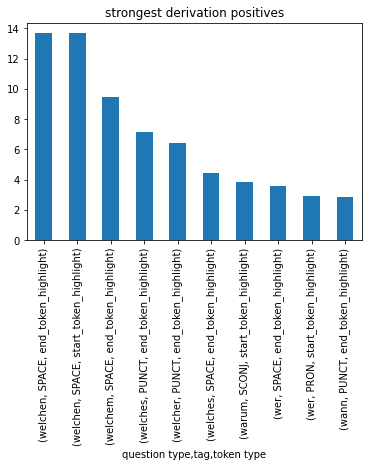

In [11]:
overview_df \
    .set_index(['question type', 'tag', 'token type']) \
    .sort_values('percentage difference', ascending = False) \
    .head(10)['percentage difference'] \
    .plot(kind='bar', title = 'strongest derivation positives')

### Strongest negatives

<AxesSubplot:title={'center':'strongest derivation positives'}, xlabel='question type,tag,token type'>

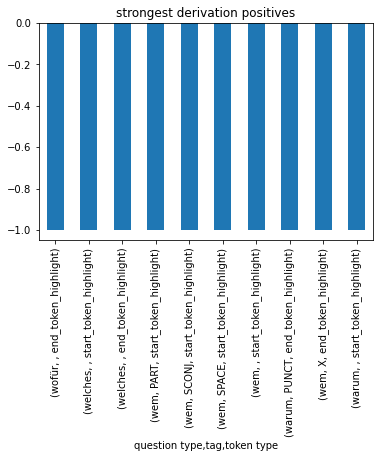

In [12]:
overview_df \
    .set_index(['question type', 'tag', 'token type']) \
    .sort_values('percentage difference', ascending = True) \
    .head(10)['percentage difference'] \
    .plot(kind='bar', title = 'strongest derivation positives')

<AxesSubplot:title={'center':'percentage difference start token'}>

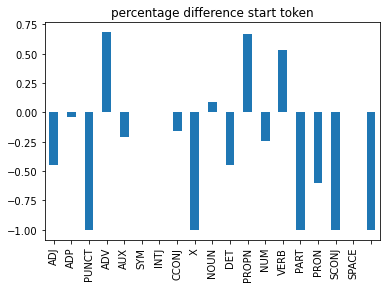

In [13]:
frequencies_df['start token deviation from general'].plot(kind="bar", title = 'percentage difference start token')

<AxesSubplot:title={'center':'total difference start token'}>

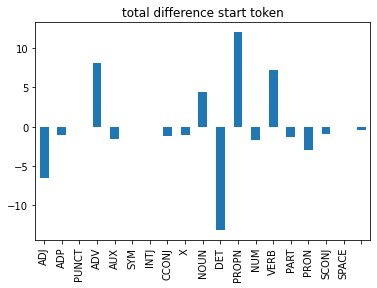

In [14]:
frequencies_df['start token total deviation'].plot(kind="bar", title = 'total difference start token')

<AxesSubplot:title={'center':'percentage difference end token'}>

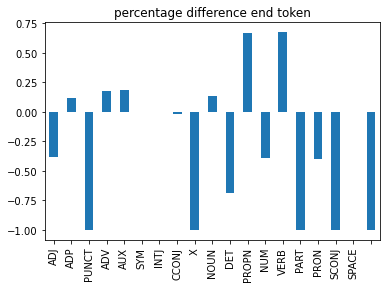

In [15]:
frequencies_df['end token deviation from general'].plot(kind="bar", title = 'percentage difference end token')

<AxesSubplot:title={'center':'total difference end token'}>

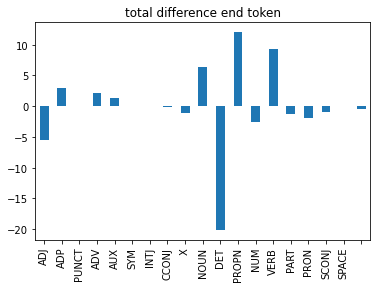

In [16]:
frequencies_df['end token total deviation'].plot(kind="bar", title = 'total difference end token')

### notes thorsten idee
auf question-ebene betrachten
